## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [2]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=5):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    # ret = None
    feat = []
    for i in range(1, feature_num+1):
        feat.append(x**i)
    ret = np.concatenate(feat, axis=1)
    return ret

def gaussian_basis(x, feature_num=20):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    # ret = None
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    
    out = (x-centers)/width
    ret = np.exp(-0.5 * out ** 2)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [3]:
def main(x_train, y_train, method='ls'):
    """
    训练模型, 并返回从x到y的映射。
    """

    # basis_func = identity_basis
    # basis_func = multinomial_basis
    basis_func = gaussian_basis

    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========

    # phi_max = np.max(phi, axis=0)
    # phi = phi / phi_max

    # 最小二乘法计算
    w_ls = np.linalg.pinv(phi).dot(y_train)

    # 梯度下降法计算
    def gradient_descent(phi, y, learning_rate=1, iterations=10000):
        m, n = phi.shape
        w = np.zeros(n)
        for i in range(iterations):
            predictions = np.dot(phi, w)
            errors = predictions - y
            gradient = (1/m) * np.dot(phi.T, errors)
            w -= learning_rate * gradient
        return w

    w_gd = gradient_descent(phi, y_train)

    if method == 'ls':
        w = w_ls
    elif method == 'gd':
        w = w_gd

    
    # w /= phi_max
    display(w)
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)


array([  7.76335664, -10.00681511,   5.51152492,  -4.52313826,
        -0.72236748,  -5.61759759,   2.12200016,   1.4210192 ,
         2.46869559,  -2.60830205,   0.8512471 ,   2.61720438,
         6.57860607,   1.57137679,   2.63328187,   0.92596651,
         9.76709254,   3.82954301,  10.07396527,  -3.97881618,
        16.72574669])

训练集预测值与真实值的标准差：0.1
预测值与真实值的标准差：0.1


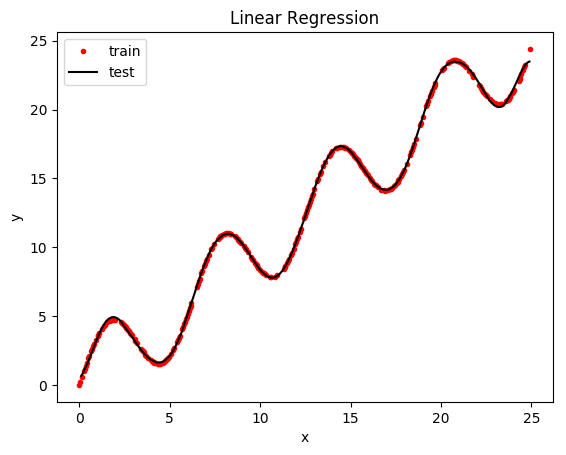

In [4]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train, 'ls')

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    # plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

(300,)
(200,)


array([ 9.54642553e+00, -1.09980681e+01,  4.48378751e+00, -4.45728622e+00,
       -2.53443767e+00, -5.02684503e+00,  1.24767111e-03,  2.16360322e+00,
        2.87148523e-01, -1.84652702e+00, -1.33011229e+00,  3.42532569e+00,
        4.23695163e+00,  2.64258505e+00, -6.40623083e-02,  2.36564676e+00,
        6.82494301e+00,  5.33224566e+00,  7.21617872e+00, -2.71716355e+00,
        1.44165107e+01])

训练集预测值与真实值的标准差：0.1
预测值与真实值的标准差：0.1


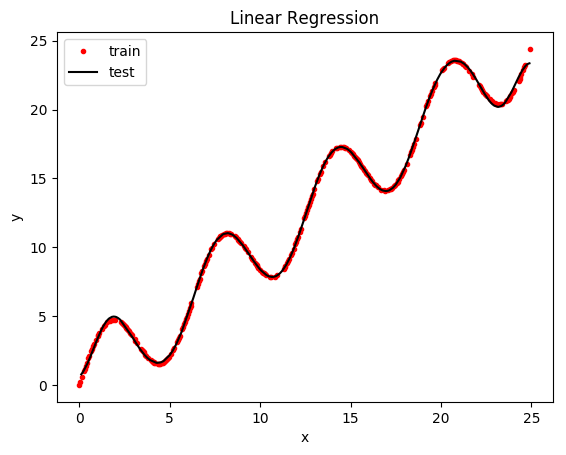

In [5]:
# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train, 'gd')

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    # plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()